In [1]:
#Preparation

In [2]:
from torch import nn, optim
import torch
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader

In [3]:
torch.manual_seed(1)

In [5]:
# The function for plotting 2D

def Plot_2d_Plane(model, datasest, n=0):
    w1 = model.state_dict()['linear.weight'].numpy()[0][0]
    w2 = model.state_dict()['linear.weight'].numpy()[0][1]
    b = model.state_dict()['linear.bias'].numpy()
    
    #Data
    x1 = data_set.x[:, 0].view(-1, 1).numpy()
    x2 = data_set.x[:, 1].view(-1, 1).numpy()
    y = data_set.y.numpy()
    
    #Make plane
    X, Y = np.meshgrid(np.arange(x1.min(), x1.max(), 0.05), np.arange(x2.min(), x2.max(), 0.05))
    yhat = w1 * X + w2 * Y + b
    
    #Plotting
    fig = plt.figure()
    ax = fig.gca(projection = '3d')
    
    #Scatter plot
    ax.plot(x1[:, 0], x2[:, 0], y[:, 0], 'ro', label = 'y')
    #Plane plot
    ax.plot_surface(X, Y,yhat)
    
    ax.set_xlabel('x1 ')
    ax.set_ylabel('x2 ')
    ax.set_zlabel('y')
    plt.title('estimated plane iteration: ' +str(n))
   
    ax.legend()
    plt.show()

In [6]:
# Make data
# Create a 2D dataset

class Data2D(Dataset):
    #constructor
    def __init__(self):
        self.x = torch.zeros(20, 2)
        self.x[:, 0] = torch.arange(-1, 1, 0.1)
        self.x[:, 1] = torch.arange(-1, 1, 0.1)
        self.w = torch.tensor([[1.0], [1.0]])
        self.b = 1
#torch.mm : uses matrix multiplication instead of scaler multiplication
        self.f = torch.mm(self.x, self.w) + self.b
        self.y = self.f + 0.1 * torch.randn((self.x.shape[0], 1))
        self.len = self.x.shape[0]
        
    #Getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    #get length
    def __len__(self):
        return self.len

In [13]:
data_set = Data2D()

In [14]:
# Create a customized linear

class linear_regression(nn.Module):
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [15]:
# Create the linear regression model and print the parameters

model = linear_regression(2, 1)
print("The parameters: ", list(model.parameters()))

The parameters:  [Parameter containing:
tensor([[0.1555, 0.2571]], requires_grad=True), Parameter containing:
tensor([0.3505], requires_grad=True)]


In [16]:
# Create the optimizer

optimizer = optim.SGD(model.parameters(), lr = 0.1)

In [17]:
# Create the cost function

criterion = nn.MSELoss()

In [18]:
# Create the data loader

trainloader = DataLoader(dataset = data_set, batch_size = 2)

Before training: 


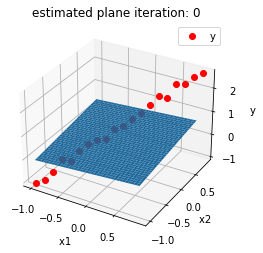

After training: 


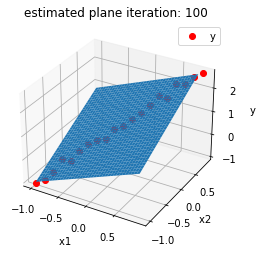

In [23]:
# Train the model in Mini-batch gradient descent

LOSS = []
print("Before training: ")
Plot_2d_Plane(model, data_set)
epochs = 100

def train_model(epochs):
    for epoch in range(epochs):
        for x, y in trainloader:
            yhat = model(x)
            loss = criterion(yhat, y)
            LOSS.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
train_model(epochs)
print("After training: ")
Plot_2d_Plane(model, data_set, epochs)

Text(0, 0.5, 'Cost.total loss')

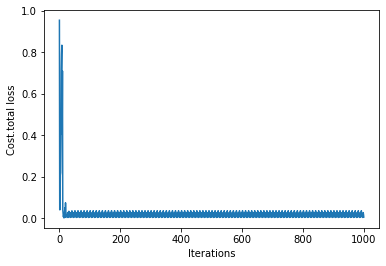

In [24]:
# Plot out the Loss and iteration diagram

plt.plot(LOSS)
plt.xlabel("Iterations")
plt.ylabel("Cost.total loss")

In [ ]:
# Practice create model1. Train the model with batch size 30 and learning rate 0.1, store the loss in a list <code>LOSS1</code>. Plot the results.

data_set = Data2D()
trainloader = TrainLoader(dataset = data_set, batch_size = 30)